In [1]:
#Завдання 1
from pulp import *

# Створення моделі
model = LpProblem("Оптимальне_Виробництво", LpMaximize)

# Змінні
x1 = LpVariable("x1", 0, None, LpContinuous)  # Лимонад
x2 = LpVariable("x2", 0, None, LpContinuous)  # Фруктовий сік

# Цільова функція
model += x1 + x2

# Обмеження
model += 2*x1 + x2 <= 100, "Обмеження_води"
model += x1 <= 50, "Обмеження_цукру"
model += x1 <= 30, "Обмеження_лимонного_соку"
model += 2*x2 <= 40, "Обмеження_фруктового_пюре"

# Вирішення задачі
model.solve()

# Отримання результатів
print("Оптимальне виробництво:")
print(f"Лимонад: {x1.varValue} од.")
print(f"Фруктовий сік: {x2.varValue} од.")

# Розрахунок використаних інгредієнтів
води_використано = 2*x1.varValue + x2.varValue
цукру_використано = x1.varValue
лимонного_соку_використано = x1.varValue
фруктового_пюре_використано = 2*x2.varValue

print("Використано ресурсів:")
print(f"Води: {води_використано} од. з максимально доступних 100 од.")
print(f"Цукру: {цукру_використано} од. з максимально доступних 50 од.")
print(f"Лимонного соку: {лимонного_соку_використано} од. з максимально доступних 30 од.")
print(f"Фруктового пюре: {фруктового_пюре_використано} од. з максимально доступних 40 од.")

Оптимальне виробництво:
Лимонад: 30.0 од.
Фруктовий сік: 20.0 од.
Використано ресурсів:
Води: 80.0 од. з максимально доступних 100 од.
Цукру: 30.0 од. з максимально доступних 50 од.
Лимонного соку: 30.0 од. з максимально доступних 30 од.
Фруктового пюре: 40.0 од. з максимально доступних 40 од.


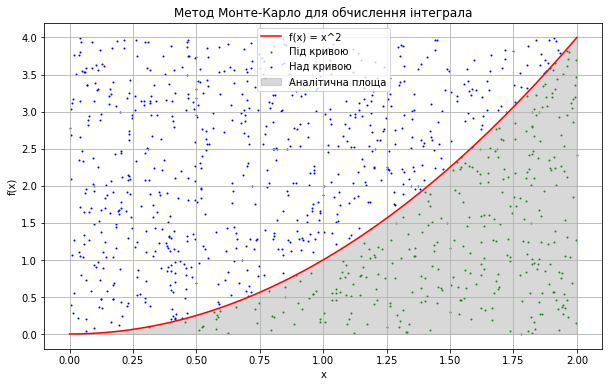

In [3]:
#Завдання 2

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as spi
import random

# Визначення функції та межі інтегрування
def f(x):
    return x ** 2

a = 0  # Нижня межа
b = 2  # Верхня межа

# Аналітичний розрахунок інтеграла за допомогою SciPy
analytical_result, _ = spi.quad(f, a, b)

# Метод Монте-Карло для обчислення інтеграла
def monte_carlo_integral(func, a, b, num_samples=10000):
    random_points = [random.uniform(a, b) for _ in range(num_samples)]
    func_values = [func(x) for x in random_points]
    average_value = sum(func_values) / num_samples
    estimated_area = average_value * (b - a)
    return estimated_area

# Обчислення інтеграла методом Монте-Карло
monte_carlo_result = monte_carlo_integral(f, a, b, 10000)

analytical_result, monte_carlo_result
# Візуалізація результатів

# Створення діапазону значень для x та обчислення значень функції
x = np.linspace(a, b, 400)
y = f(x)

# Генерація випадкових точок для візуалізації методу Монте-Карло
x_random = np.random.uniform(a, b, 1000)
y_random = np.random.uniform(0, max(f(x)), 1000)

# Відбір точок, що знаходяться під кривою
below_curve = y_random < f(x_random)

# Створення графіка
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = x^2', color='red')  # Функція
plt.scatter(x_random[below_curve], y_random[below_curve], color='green', s=1, label='Під кривою')
plt.scatter(x_random[~below_curve], y_random[~below_curve], color='blue', s=1, label='Над кривою')
plt.fill_between(x, y, color='gray', alpha=0.3, label='Аналітична площа')
plt.title('Метод Монте-Карло для обчислення інтеграла')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()